Aufgabenstellung: Passagiere ohne Familienmitglieder auf der Titanic

1. **Ermittlung von Alleinreisenden:**

Berechne für jeden Passagier die FamilySize anhand der Spalten SibSp
(Anzahl der Geschwister/Ehepartner) und Parch (Anzahl der Eltern/Kinder).

Identifiziere alle Passagiere, deren FamilySize gleich 0 ist. Diese Passagiere
sind allein gereist, ohne Familienmitglieder an Bord.

In [103]:
import pandas as pd
tit = pd.read_csv('titanic.csv') # Lesen der CSV-Datei

tit['FamilySize']=tit['SibSp'] + tit['Parch'] # Erstellen der neuen Spalte FamilySize, die besteht aus Summe Familiemitgliedern

single_pass= tit[tit['FamilySize'] == 0] # Filtern nach Alleinreisenden

print(single_pass)



     PassengerId  Survived  Pclass                          Name     Sex  \
2              3         1       3        Heikkinen, Miss. Laina  female   
4              5         0       3      Allen, Mr. William Henry    male   
5              6         0       3              Moran, Mr. James    male   
6              7         0       1       McCarthy, Mr. Timothy J    male   
11            12         1       1      Bonnell, Miss. Elizabeth  female   
..           ...       ...     ...                           ...     ...   
884          885         0       3        Sutehall, Mr. Henry Jr    male   
886          887         0       2         Montvila, Rev. Juozas    male   
887          888         1       1  Graham, Miss. Margaret Edith  female   
889          890         1       1         Behr, Mr. Karl Howell    male   
890          891         0       3           Dooley, Mr. Patrick    male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  FamilySize  
2    26

2. Anzahl der Alleinreisenden:
Berechne die Gesamtanzahl der Alleinreisenden und die prozentuale
Verteilung im Vergleich zur Gesamtanzahl aller Passagiere.


In [106]:
single_pass_anzahl = tit[tit['FamilySize'] == 0].shape[0] # Berechnung nach Alleinreisende (shape zeigt Anzahl der Zeilen)

anzahl_alle_passagiere= tit['FamilySize'].shape[0] # Berechnung der Anzahl aller Passagieren bei Titanik

def proz_verteilung(single,alle):
     return single*100/alle


print(f' Die Gesamtanzahl der Alleinreisenden ist {single_pass_anzahl}, die {proz_verteilung(single_pass_anzahl,anzahl_alle_passagiere):.2f} %  von aller Passagire ist.')

 Die Gesamtanzahl der Alleinreisenden ist 537, die 60.27 %  von aller Passagire ist.


3. Analyse der Überlebensrate:
Untersuche die Überlebensrate der Alleinreisenden. Berechne den Anteil der
überlebenden Alleinreisenden und vergleiche ihn mit der Überlebensrate der
Passagiere, die mit Familienmitgliedern gereist sind (d. h., FamilySize > 1 ).

In [107]:

single_ueberlebensrat = tit[tit['FamilySize'] == 0]['Survived'].mean().round(2)

family_uberlebenstrat =tit[tit['FamilySize'] >= 1]['Survived'].mean().round(2)
print(f' Das Überlebensrat der Alleinreisenden ist {single_ueberlebensrat}')
print(f' Das Überlebensrat der Passagieren mit Familie {family_uberlebenstrat}')

 Das Überlebensrat der Alleinreisenden ist 0.3
 Das Überlebensrat der Passagieren mit Familie 0.51


4. Visualisierung:
Stelle die Verteilung der Überlebensraten von Alleinreisenden und
Passagieren mit Familienmitgliedern in einem Säulendiagramm dar, um
Unterschiede zu veranschaulichen.

Text(0, 0.5, 'Überlebensrat')

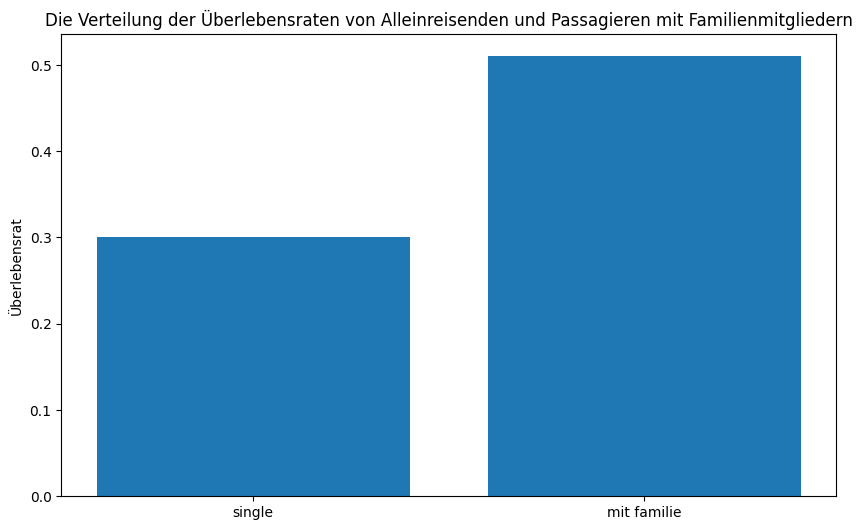

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
categories = ['single', 'mit familie']
values= [single_ueberlebensrat, family_uberlebenstrat]
plt.bar(categories, values)
plt.title('Die Verteilung der Überlebensraten von Alleinreisenden und Passagieren mit Familienmitgliedern')
plt.ylabel('Überlebensrat')

5. Zusätzliche Analyse :
Untersuche, ob es Unterschiede in der Verteilung der Alleinreisenden nach
anderen Merkmalen gibt, wie z. B. Pclass (Passagierklasse) oder Sex 

411 126 166 188


Text(0, 0.5, 'Anzahl der Personen')

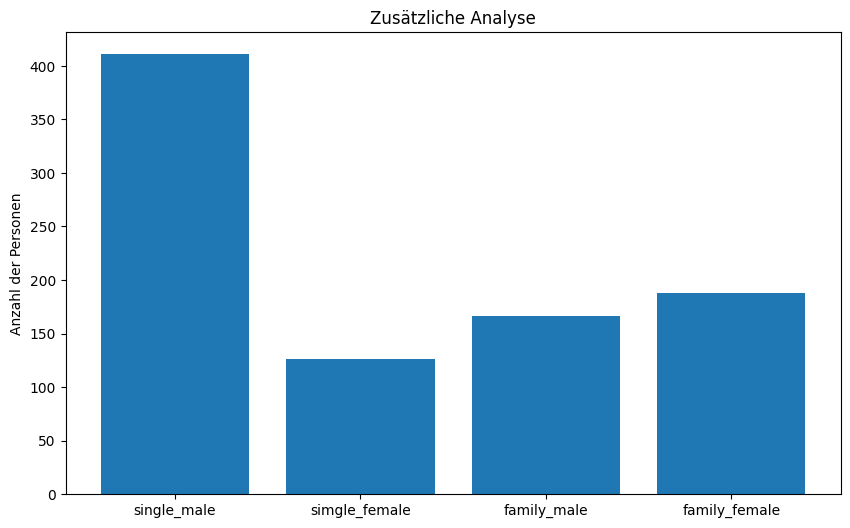

In [108]:

tit.loc[tit['Sex'] =='male', 'Sex'] = 1 # Tausch des Geschlechtes in Zahlform, um zu berechnen
tit.loc[tit['Sex'] =='female', 'Sex'] = 0
single_male = tit[tit['FamilySize'] == 0]['Sex'].sum()# Berechnung der Anzahl von Single Männer
single_female = single_pass_anzahl-single_male
familie_male = tit[tit['FamilySize'] >= 1]['Sex'].sum()
familie_female = anzahl_alle_passagiere - single_pass_anzahl - familie_male
print(single_male, single_female, familie_male, familie_female)
plt.figure(figsize=(10,6))
categories = ['single_male', 'simgle_female', 'family_male', 'family_female']
values= [single_male, single_female,  familie_male, familie_female]
plt.bar(categories, values)
plt.title('Zusätzliche Analyse')
plt.ylabel('Anzahl der Personen')



C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_17096\4258997514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=alleinreisende, palette='Set2')


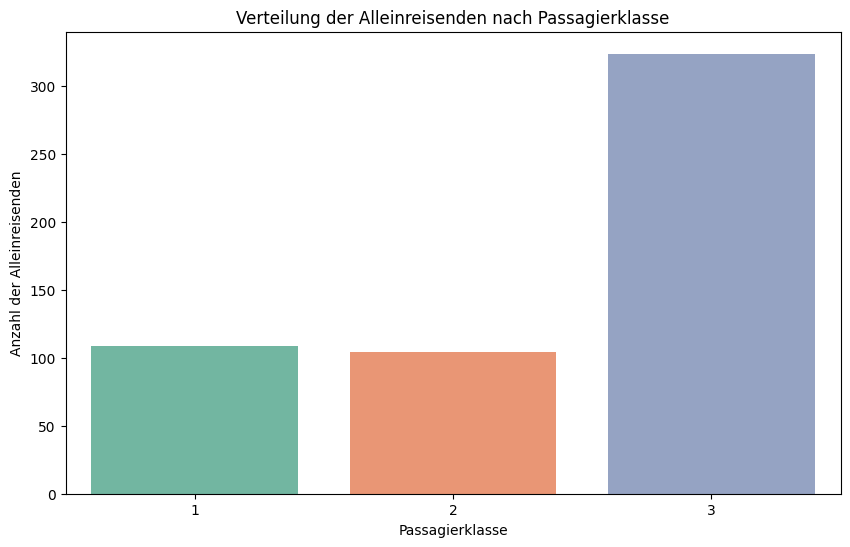

C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_17096\4258997514.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=alleinreisende, palette='Set2')


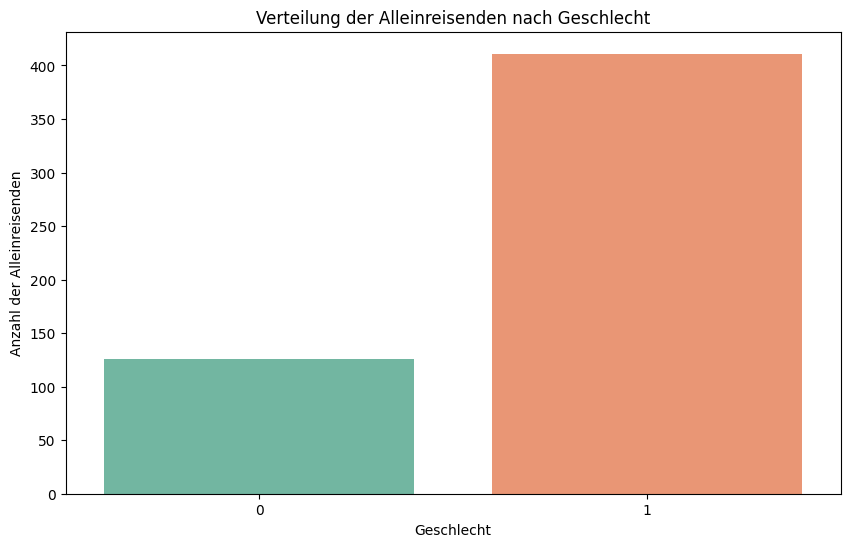

In [109]:
import seaborn as sns

alleinreisende = tit[tit['FamilySize'] == 0]
#alleinreisende_pklass= alleinreisende.value_counts
#print(alleinreisende_pklass)
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=alleinreisende, palette='Set2')
plt.title('Verteilung der Alleinreisenden nach Passagierklasse')
plt.xlabel('Passagierklasse')
plt.ylabel('Anzahl der Alleinreisenden')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=alleinreisende, palette='Set2')
plt.title('Verteilung der Alleinreisenden nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Alleinreisenden')
plt.show()


    Fam_Status  Sex  Survived
0  mit Familie    0       188
1  mit Familie    1       166
2       single    0       126
3       single    1       411


<Axes: xlabel='Fam_Status', ylabel='Survived'>

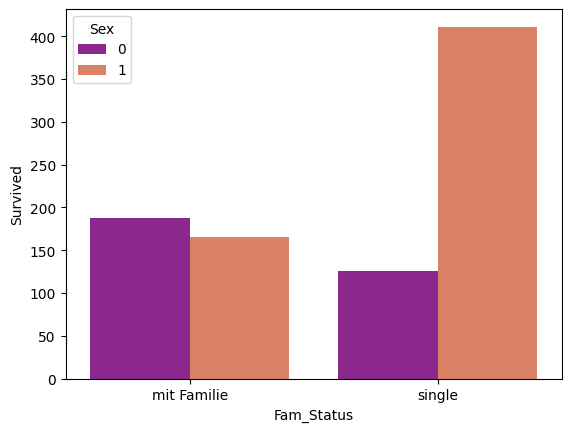

In [110]:
tit['Fam_Status'] = tit['FamilySize'].apply(lambda x: 'single' if x == 0 else 'mit Familie')
tit.head(3)

filtr= tit.groupby(['Fam_Status', 'Sex'])['Survived'].size().reset_index()#reset_index zeigt wie DataFrame
print(filtr)
# plt.figure(figsize=(10, 6))
sns.barplot( data=filtr, x='Fam_Status', y='Survived', hue='Sex', palette='plasma')

In [ ]:
list(plt.colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

    Fam_Status  Pclass  Survived
0  mit Familie       1       107
1  mit Familie       2        80
2  mit Familie       3       167
3       single       1       109
4       single       2       104
5       single       3       324


<Axes: xlabel='Fam_Status', ylabel='Survived'>

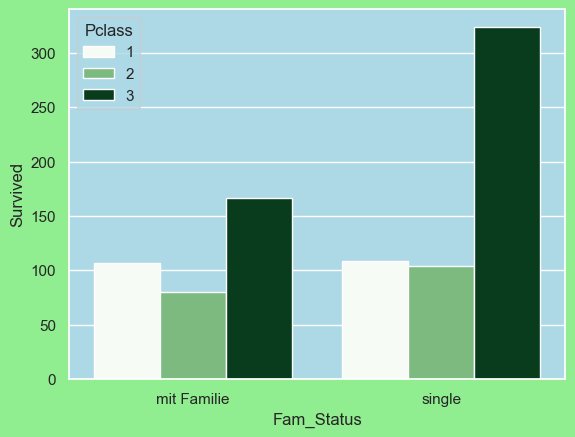

In [117]:
tit.head(3)

filtr= tit.groupby(['Fam_Status', 'Pclass'])['Survived'].size().reset_index()#reset_index zeigt wie DataFrame
print(filtr)
#sns.set_theme(style='dark') #white, darkgrid, whitegrid, dark, white, ticks
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# sns.set(rc={'axes.facecolor':'#33FFA2', 'figure.facecolor':'lightgrey'})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
sns.barplot( data=filtr, x='Fam_Status', y='Survived', hue='Pclass', palette='Greens') #flare_r
